In [1]:
#!pip install statsmodels
#!pip install catboost
#!pip install imblearn
#!pip install xgboost

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import os
import phik
from catboost import CatBoostClassifier, Pool, cv
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder,LabelEncoder,MaxAbsScaler,RobustScaler
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import BorderlineSMOTE,ADASYN,SMOTE,SVMSMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from math import ceil
from numpy.random import RandomState
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc, classification_report
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [4]:
def heatmap_pearson(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Pearson Correlation Matrix')
    plt.show()

In [5]:
def heatmap_spearman(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Spearman Correlation Matrix')
    plt.show()

In [6]:
def heatmap_phik(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Phik Correlation Matrix')
    plt.show()
    

In [7]:
def bar_charts_categorical(df, feature, target):
    """
    Function that plots the frequency and the importance that a categorical variable has with the target
    """
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation="vertical")
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),labelspacing =1)
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")
    plt.show()
    

In [8]:
def bar_charts_categorical(df, feature, target):
    """
    Function that plots the frequency and the importance that a categorical variable has with the target
    """
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation="vertical")
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),labelspacing =1)
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")
    plt.show()
    

In [9]:
def metrics(y_train, pred_train , y_val, pred_val):
    """
    Function that pritns the classification report and the confusion matrix of the train and validation dataset
    """
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    

In [10]:
def micro_f1_score(y_train, pred_train , y_val, pred_val):
    """
    Function that pritns the micro f1 score of the train and validation dataset
    """
    print('_____________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f1_score(y_train, pred_train, average='micro'))

    print('_____________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f1_score(y_val, pred_val, average='micro'))
    return f1_score(y_val, pred_val, average='micro')

In [11]:
def best_scale(model,X_train,y_train,X_test,y_test):
    """
    Function that returns a table with the micro f1 score for the different scaler
    """
    standard=StandardScaler().fit(X_train).transform(X_train)
    standardTest=StandardScaler().fit(X_test).transform(X_test)

    minMax=MinMaxScaler().fit(X_train).transform(X_train)
    minMaxTest=MinMaxScaler().fit(X_test).transform(X_test)

    maxAbs=MaxAbsScaler().fit(X_train).transform(X_train)
    maxAbsTest=MaxAbsScaler().fit(X_test).transform(X_test)
        
    robust=RobustScaler().fit(X_train).transform(X_train)
    robustTest=RobustScaler().fit(X_test).transform(X_test)

    sclares=[standard,minMax,maxAbs,robust,X_train]
    sclaresTest=[standardTest,minMaxTest,maxAbsTest,robustTest,X_test]
    
    f_score=[]
    
    for i in range(len(sclares)):
        model.fit(sclares[i],y_train)
        y_pred=model.predict(sclaresTest[i])
        f_score.append(f1_score(y_pred,y_test,average="micro"))
        

    return pd.DataFrame(f_score,index=["Standard","MinMax","MaxAbs","Robust","No Scaler"], columns=["F1 Score"])
    

In [12]:
def roc_curve_plot(model,X_train,X_test,y_test,y_train):
    """
    Function that plots the roc curve for a given model
    """
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model.predict(X_train))
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model.predict(X_test))
    plt.plot(fpr_train, tpr_train,label="ROC Curve train")
    plt.plot(fpr_test, tpr_test,label="ROC Curve test")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()

In [13]:
original = pd.read_csv("H2.csv")
original.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                  2       1       0.0  ...  No Deposit                 6   
1                  4       2       0.0  ...  No Deposit                 9   
2                  4       1       0.0  ...  No Deposit                 9   
3                  4       2       0.0  ...  No Deposit                 9   
4                  2       2       0.0  ...  No Deposit                 9   

       Company DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0         NULL                 0    Transient   0.0                         0   
1         NULL                 0    Transient  76.5                         0   
2         NULL                 0    Transient  68.0                         0   
3         NULL                 0    Transient  76.5                         0   
4         NULL                 0    Transient  76.5                         0   

   TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
0                       0         Check-Out            2015-07-03  
1                       1          Canceled            2015-07-01  
2                       1          Canceled            2015-04-30  
3                       2          Canceled            2015-06-23  
4                       1          Canceled            2015-04-02  

[5 rows x 31 columns]

In [14]:
df=original.copy()

In [15]:
df.shape

(79330, 31)

In [16]:
df.replace('       NULL','Individual', inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [18]:
df.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [19]:
df.isna().sum()/len(df)*100

IsCanceled                     0.000000
LeadTime                       0.000000
ArrivalDateYear                0.000000
ArrivalDateMonth               0.000000
ArrivalDateWeekNumber          0.000000
ArrivalDateDayOfMonth          0.000000
StaysInWeekendNights           0.000000
StaysInWeekNights              0.000000
Adults                         0.000000
Children                       0.005042
Babies                         0.000000
Meal                           0.000000
Country                        0.030253
MarketSegment                  0.000000
DistributionChannel            0.000000
IsRepeatedGuest                0.000000
PreviousCancellations          0.000000
PreviousBookingsNotCanceled    0.000000
ReservedRoomType               0.000000
AssignedRoomType               0.000000
BookingChanges                 0.000000
DepositType                    0.000000
Agent                          0.000000
Company                        0.000000
DaysInWaitingList              0.000000


In [20]:
df.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                  2       1       0.0  ...  No Deposit                 6   
1                  4       2       0.0  ...  No Deposit                 9   
2                  4       1       0.0  ...  No Deposit                 9   
3                  4       2       0.0  ...  No Deposit                 9   
4                  2       2       0.0  ...  No Deposit                 9   

      Company DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0  Individual                 0    Transient   0.0                         0   
1  Individual                 0    Transient  76.5                         0   
2  Individual                 0    Transient  68.0                         0   
3  Individual                 0    Transient  76.5                         0   
4  Individual                 0    Transient  76.5                         0   

   TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
0                       0         Check-Out            2015-07-03  
1                       1          Canceled            2015-07-01  
2                       1          Canceled            2015-04-30  
3                       2          Canceled            2015-06-23  
4                       1          Canceled            2015-04-02  

[5 rows x 31 columns]

In [21]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [22]:
#Tem demasiadas variaveis categoricas
df.drop(['DepositType'],axis=1,inplace=True)

In [23]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList',
       'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [24]:
categorical = df.select_dtypes(include="object").columns.to_list()
numerical = df.columns.drop(categorical).drop("IsCanceled").to_list()

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>6 - Data Visualization and Feature Engineering for Numerical Features</font> <a class="anchor" id="sixth-bullet"></a>
    
</div>

### Cancelation ratio per year

In [25]:
year_df=df.loc[:,['ArrivalDateYear','IsCanceled']]

In [26]:
df_year = df.groupby(['ArrivalDateYear', 'IsCanceled']).size().reset_index()
df_year['percentage'] = df.groupby(['ArrivalDateYear', 'IsCanceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_year.columns = ['ArrivalDateYear', 'IsCanceled', 'Counts', 'Percentage']
year_fig = px.bar(df_year, x='ArrivalDateYear', y=['Counts'], color='IsCanceled', text=df_year['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

In [27]:
year_fig.update_traces(marker_color=['grey','darkred']*3)
year_fig.write_html('year_fig.html')

### Cancelation Ratio % by Month and Year

In [28]:
df["Arrival Year and Month"] = df.ArrivalDateYear.astype(str) + " " + df.ArrivalDateMonth.astype(str)

In [29]:
ordered_months = ["2015 July", "2015 August", "2015 September", "2015 October", "2015 November", "2015 December"
        ,"2016 January", "2016 February", "2016 March", "2016 April", "2016 May", "2016 June", 
          "2016 July", "2016 August", "2016 September", "2016 October", "2016 November", "2016 December",
            "2017 January", "2017 February", "2017 March", "2017 April", "2017 May", "2017 June", 
          "2017 July", "2017 August"]
df["Arrival Year and Month"]= pd.Categorical(df["Arrival Year and Month"], categories=ordered_months, ordered=True)

In [30]:
df_year_month = df.groupby(['Arrival Year and Month', 'IsCanceled']).size().reset_index()
df_year_month['Percentage'] = df.groupby(['Arrival Year and Month', 'IsCanceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_year_month.columns = ['Arrival Year and Month', 'IsCanceled', 'Counts', 'Percentage']
year_month_fig = px.bar(df_year_month, x='Arrival Year and Month', y=['Counts'], color='IsCanceled', text=df_year_month['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

In [31]:
year_month_fig.update_traces(marker_color=['grey','darkred']*26)
year_month_fig.write_html('year_month_fig.html')

### Home  Country of Guests

In [32]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList',
       'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'Arrival Year and Month'],
      dtype='object')

In [33]:
country_df = pd.DataFrame(df.loc[df["IsCanceled"] == 0]["Country"].value_counts())
country_df.rename(columns={"Country": "Number of Guests"}, inplace=True)
total_guests = country_df["Number of Guests"].sum()
country_df["Guests in %"] = round(country_df["Number of Guests"] / total_guests * 100, 2)
country_df["Country"] = country_df.index
country_df.loc[country_df["Guests in %"] < 2, "country"] = "Other"

# pie plot
country_fig = px.pie(country_df,
             values="Number of Guests",
             names="Country",
             title="Home country of guests",
             template="seaborn")

country_fig.update_traces(textposition="inside", textinfo="value+percent+label")
country_fig.write_html('country_fig.html')

### Lead Time vs ADR by Booking Status

In [34]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList',
       'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'Arrival Year and Month'],
      dtype='object')

In [35]:
x = df['LeadTime']
y = df['ADR']
color = df['IsCanceled']

data = dict(type='scatter',
            x=x, 
            y=y,  
            mode='markers',
            marker=dict(
                        color=color,
                        colorbar=dict(title=dict(text='Canceled')),
                        colorscale='Viridis',
                        showscale=True,
                        line=dict(
                                  color='black',
                                  colorscale='inferno' #Not in use here since our line color is fixed!
                                )
                       ),
            hovertemplate="LeadTime: <b>%{x}</b> <br><br>" + 
                        "ADR: %{y} <br>" +
                        "Canceled: %{color} <br>" 
                       
            
            ,
            name='Scatter Visualization',
            showlegend=False
           )



layout = dict(title=dict(text='Lead Time vs ADR by Booking Status'),
              yaxis=dict(title='ADR'),
              xaxis=dict(title='LeadTime')
             )


fig_lead_adr = go.Figure(data=data, layout=layout)

fig_lead_adr.write_html('fig_lead_adr.html')

### Lead Time By Cancelations 

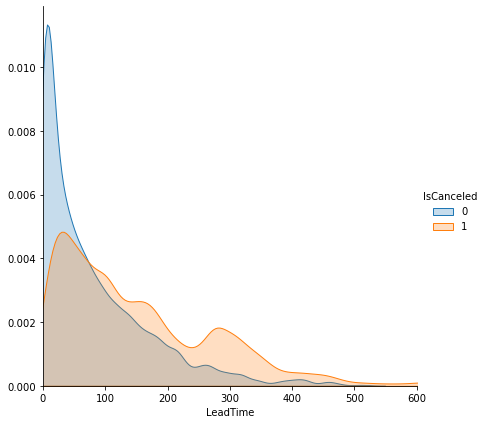

In [36]:
fig_lead_cancel = sns.FacetGrid(df, hue = 'IsCanceled',
                                 height = 6,

                                 xlim = (0,600)
                                 ).map(sns.kdeplot, 'LeadTime', shade = True).add_legend()
plt.show()

### ADR market segments per room type

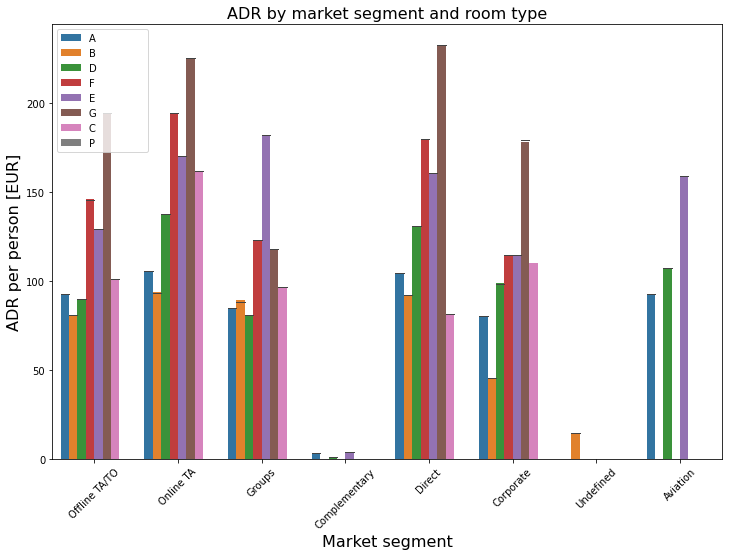

In [37]:
# show figure:
plt.figure(figsize=(12,8))
sns.barplot(x="MarketSegment",y="ADR",hue="ReservedRoomType",data=df,ci=0,errwidth=1,capsize=0.1)
plt.title("ADR by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person [EUR]", fontsize=16)
plt.legend(loc="upper left")
plt.show()

### Number of Nights

In [38]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList',
       'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'Arrival Year and Month'],
      dtype='object')

In [39]:
df["total_nights"] = df["StaysInWeekendNights"] + df["StaysInWeekNights"]
num_nights= list(df["total_nights"].value_counts().index)
num_bookings = list(df["total_nights"].value_counts())
rel_bookings = df["total_nights"].value_counts() / sum(num_bookings) * 100 # convert to percent
res_nights = pd.DataFrame({"num_nights": num_nights,"rel_num_bookings": rel_bookings}).reset_index(drop=True)

<AxesSubplot:xlabel='num_nights', ylabel='rel_num_bookings'>

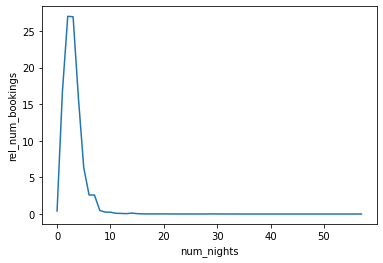

In [40]:
sns.lineplot(data=res_nights, x="num_nights", y="rel_num_bookings")

In [41]:
# total bookings per market segment (incl. canceled)
segments=df["MarketSegment"].value_counts()
# pie plot
MS_fig = px.pie(segments,values=segments.values,names=segments.index,title="Bookings per market segment",template="seaborn")
MS_fig.update_traces(rotation=-90, textinfo="percent+label")
MS_fig.show()


# Correlation 

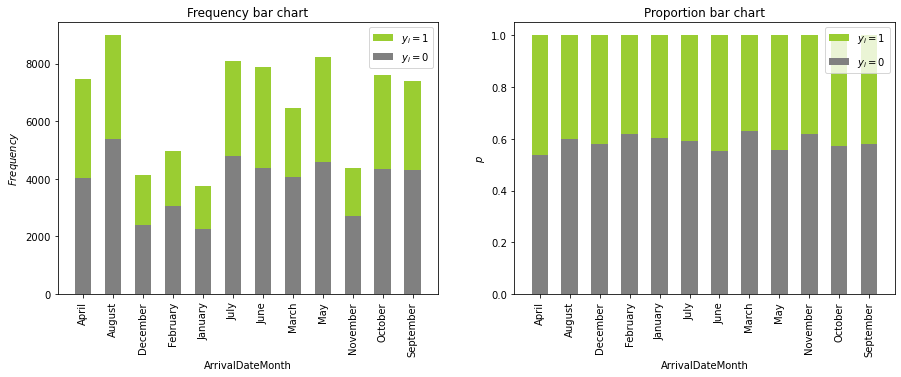

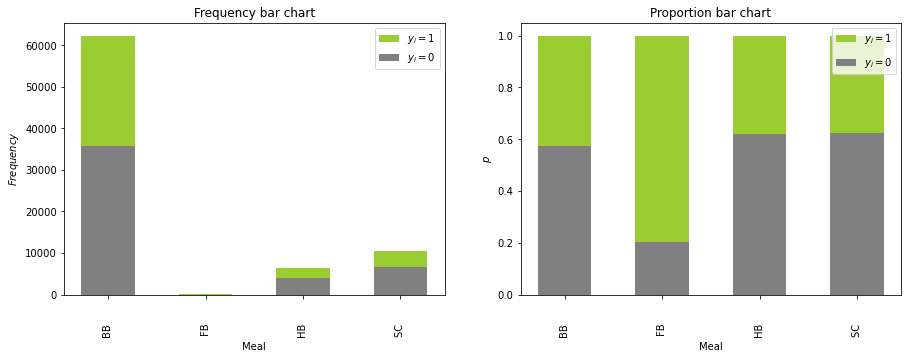

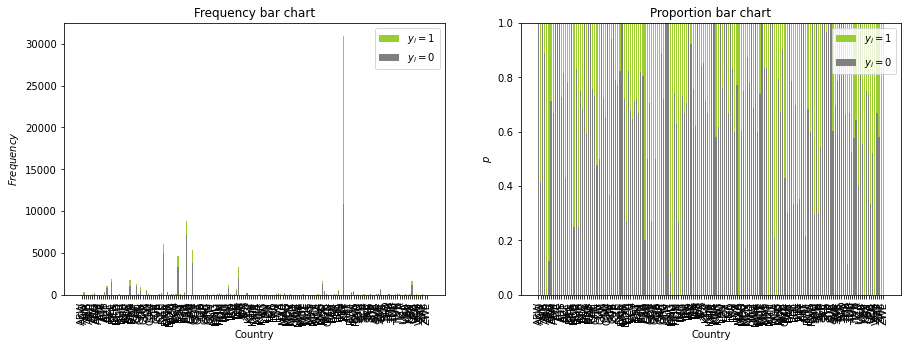

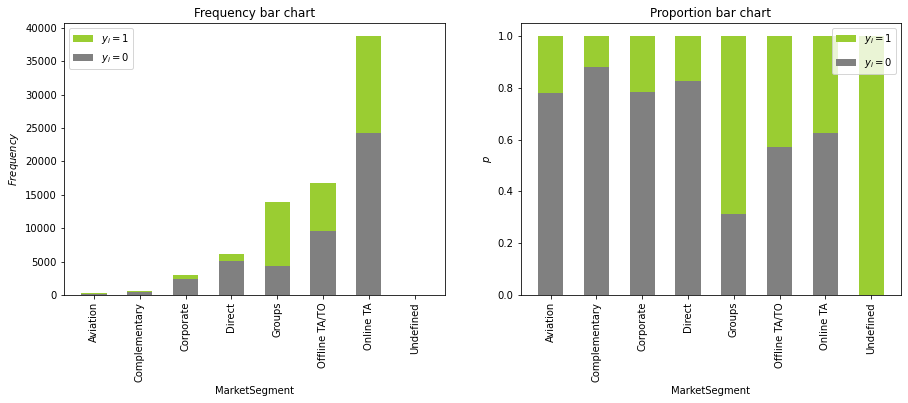

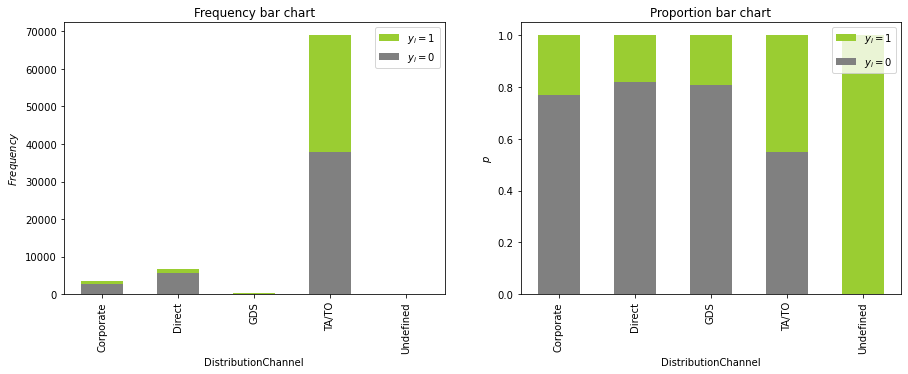

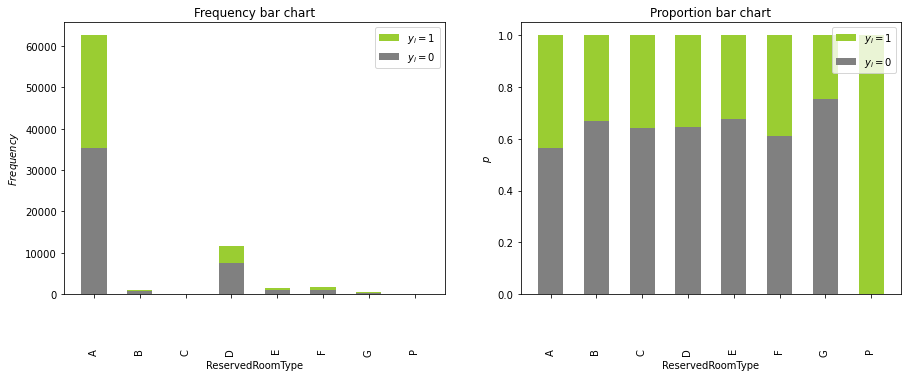

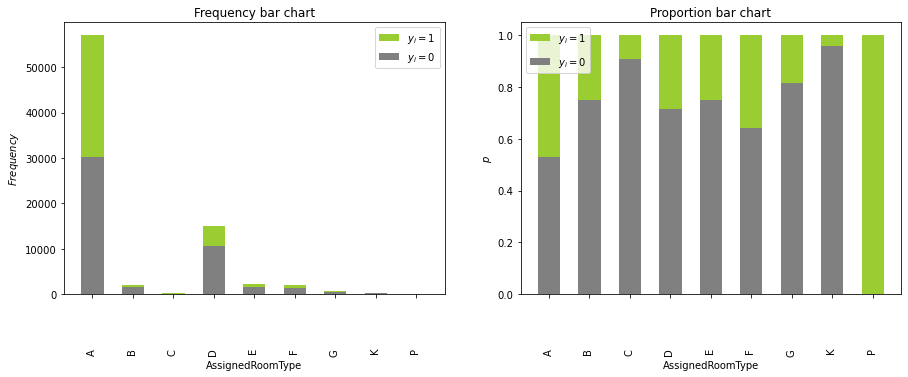

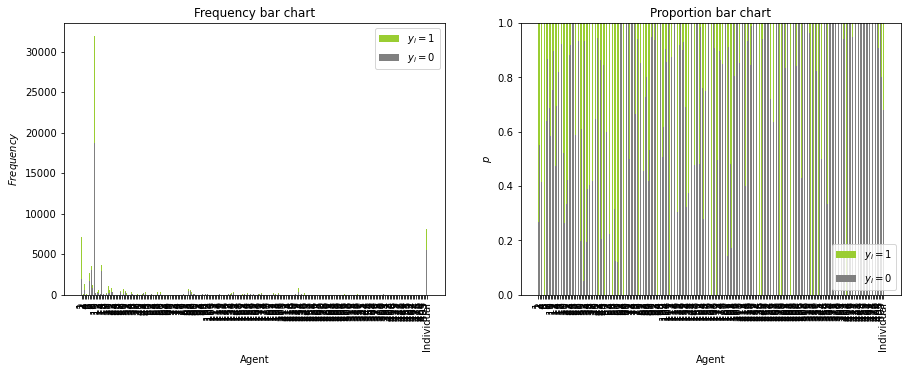

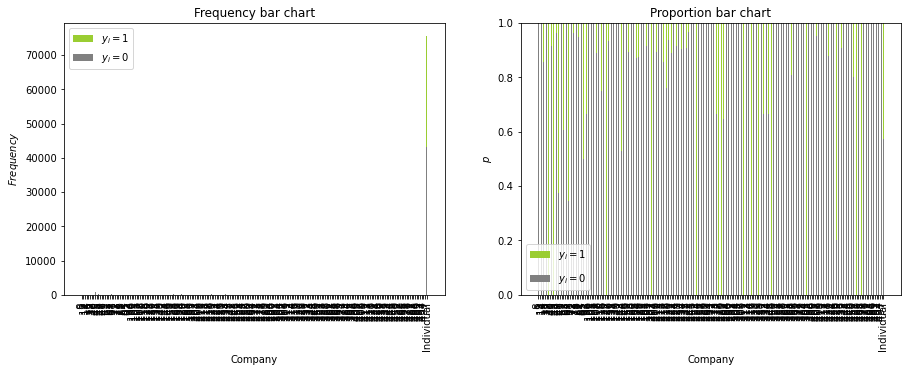

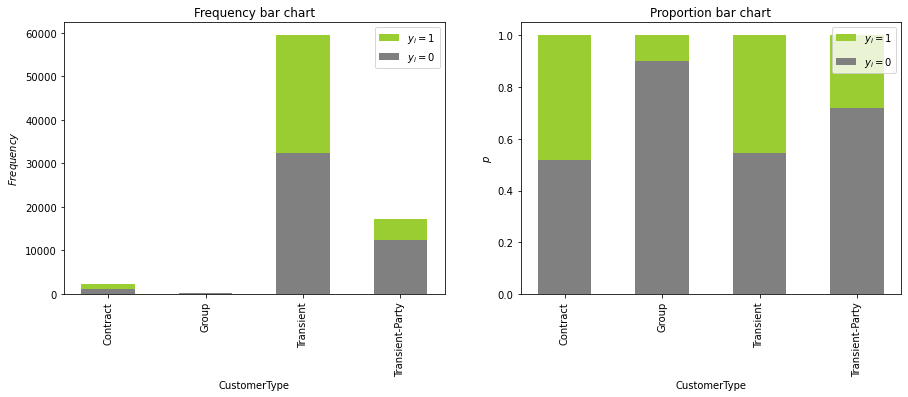

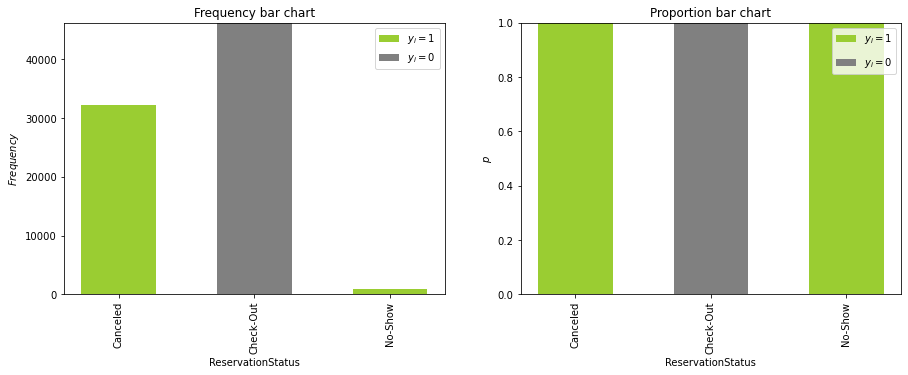

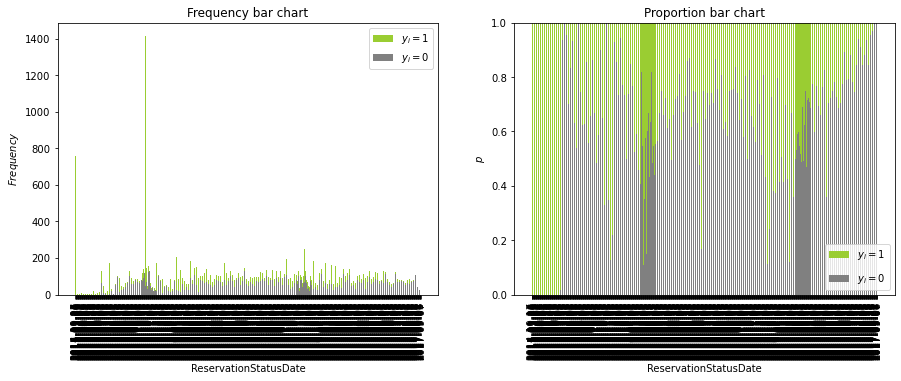

In [42]:
for i in categorical:   
    bar_charts_categorical(df, i, "IsCanceled")

In [43]:
#Demasiadas categorias 
df.drop(['Country','Agent','Company','ReservationStatusDate'],inplace=True,axis=1)

In [44]:
#100% correlacionado com o target
df.drop('ReservationStatus',axis=1,inplace=True)

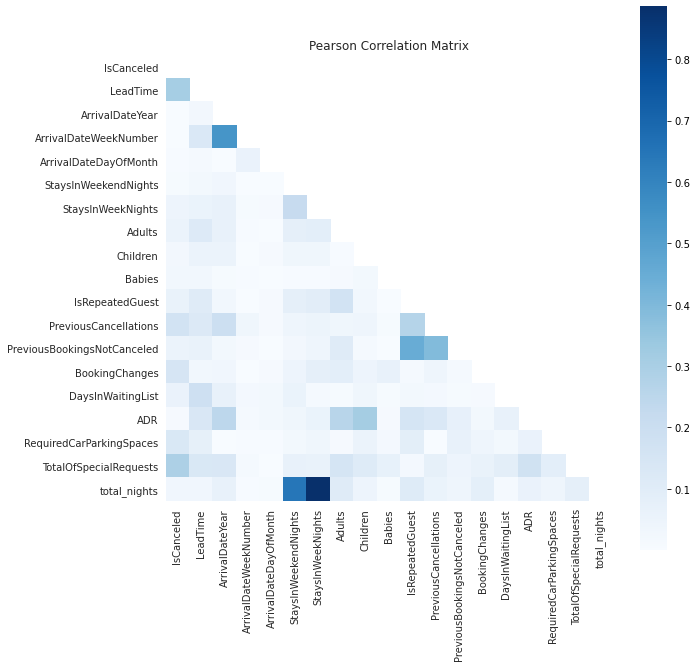

In [45]:
heatmap_pearson(df.corr(method='pearson').abs())

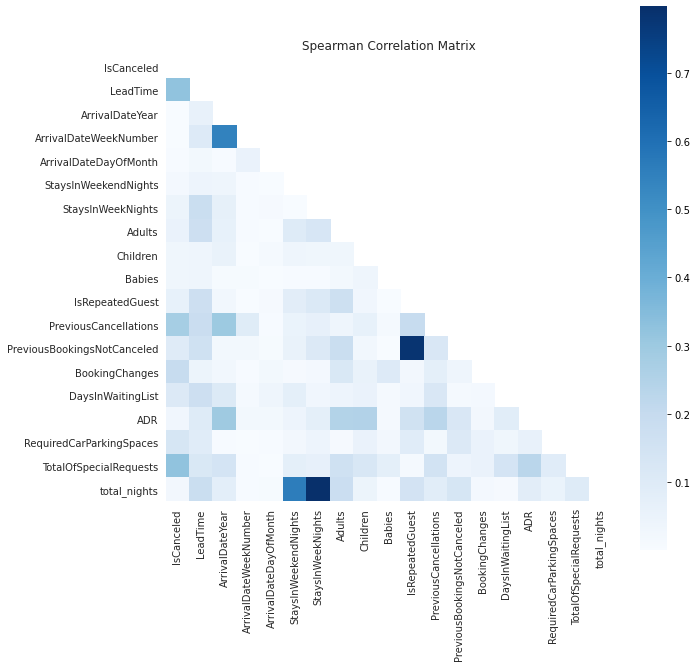

In [46]:
heatmap_spearman(df.corr(method='spearman').abs())

interval columns not set, guessing: ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'total_nights']


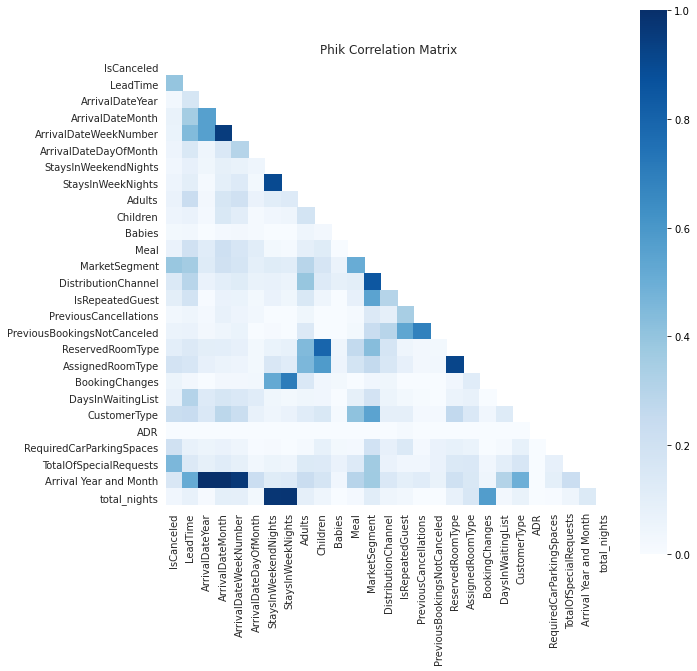

In [47]:
heatmap_phik(df.phik_matrix().abs())

<div class="alert alert-block alert-info">

### Data Imputation
    
</div>

In [48]:
df.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       4
Babies                         0
Meal                           0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
Arrival Year and Month         0
total_nights                   0
dtype: int64

In [49]:
imputer = KNNImputer(n_neighbors=4)
metric_features = df.columns.to_list()
df[numerical] = imputer.fit_transform(df[numerical])

In [50]:
df.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
Arrival Year and Month         0
total_nights                   0
dtype: int64

## Outliers

In [51]:
categorical = df.select_dtypes(include=["object",'category']).columns.to_list()
numerical = df.columns.drop(categorical).drop("IsCanceled").to_list()

In [52]:
df_b4_out = df.copy()

#### Isolation Forest

In [53]:
data_central = df.copy()

In [54]:
iso = IsolationForest(contamination=0.01)
iso_df = iso.fit_predict(data_central[numerical])

In [55]:
mask_out =iso_df == -1
outliers_if=data_central[mask_out]
data_central.drop(outliers_if.index,inplace=True)

In [56]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 1.001 %


#### Minimum Covariance Determinant

In [57]:
ee = EllipticEnvelope(contamination=0.019)
ee_df = ee.fit_predict(data_central[numerical])

In [58]:
mask_out =ee_df == -1
outliers_mcd=data_central[mask_out]
data_central.drop(outliers_mcd.index,inplace=True)

In [59]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 2.883 %


In [60]:
df = data_central.copy()

#### PCA Visualization of outliers

In [61]:
df_pca = df_b4_out.copy()

In [62]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca[numerical])
pca_feat  # What is this output?

array([[-9.69021588e+01, -1.11716078e+02, -2.42005475e+00, ...,
        -8.38139258e-02, -3.39219675e-03,  1.19394867e-14],
       [-1.99829834e+01, -3.01336034e+01, -3.35668748e+00, ...,
        -6.25952148e-03, -1.00418691e-02,  1.72921576e-14],
       [-4.23796784e+01, -4.00897102e+01, -2.76795198e+00, ...,
        -3.91187520e-02, -8.55036090e-03,  2.39111326e-15],
       ...,
       [-7.88231728e+01,  4.77203492e+01,  8.50615325e-01, ...,
         8.15672871e-03, -2.55734415e-02,  1.85094363e-16],
       [-6.48585279e-01, -6.64567249e-01, -3.10339065e+00, ...,
        -7.71821086e-04,  3.73374260e-03, -4.50283574e-16],
       [ 9.21114695e+01,  5.21761769e+01, -5.30293733e+00, ...,
         3.73699564e-02, -8.34938595e-03, -1.35231199e-16]])

In [63]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

Eigenvalue    Difference    Proportion  Cumulative
1   1.237081e+04      0.000000  8.295081e-01    0.829508
2   1.860280e+03 -10510.531021  1.247386e-01    0.954247
3   4.189495e+02  -1441.330876  2.809210e-02    0.982339
4   1.767904e+02   -242.159174  1.185444e-02    0.994193
5   7.560015e+01   -101.190211  5.069266e-03    0.999262
6   5.495342e+00    -70.104803  3.684828e-04    0.999631
7   2.863837e+00     -2.631505  1.920307e-04    0.999823
8   8.560328e-01     -2.007804  5.740012e-05    0.999880
9   5.953508e-01     -0.260682  3.992044e-05    0.999920
10  3.743828e-01     -0.220968  2.510374e-05    0.999945
11  3.007449e-01     -0.073638  2.016604e-05    0.999966
12  2.191257e-01     -0.081619  1.469318e-05    0.999980
13  1.258558e-01     -0.093270  8.439093e-06    0.999989
14  1.197565e-01     -0.006099  8.030107e-06    0.999997
15  2.385082e-02     -0.095906  1.599285e-06    0.999998
16  1.814171e-02     -0.005709  1.216468e-06    1.000000
17  7.035728e-03     -0.011106  4.717712e-07    1.000000
18  2.068847e-29     -0.007036  1.387237e-33    1.000000

In [64]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(df_pca[numerical])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

PC0         PC1
0     -96.902159 -111.716078
1     -19.982983  -30.133603
2     -42.379678  -40.089710
3     -15.994497  -29.867163
4      -8.018166  -29.369624
...          ...         ...
79325 -85.884072  -14.419987
79326 -15.307421  119.628477
79327 -78.823173   47.720349
79328  -0.648585   -0.664567
79329  92.111469   52.176177

[79330 rows x 2 columns]

In [65]:
outliers = list(outliers_mcd.index.tolist() + outliers_if.index.tolist())

def is_out(x):
    if x in outliers:
        return 'Outlier'
    else:
        return 'Not Outlier'

pca_df['OUTLIER'] = pca_df.reset_index().iloc[:,0].apply(is_out)

In [66]:
pca_df.describe(include='all')

PC0           PC1      OUTLIER
count   7.933000e+04  7.933000e+04        79330
unique           NaN           NaN            2
top              NaN           NaN  Not Outlier
freq             NaN           NaN        77043
mean    1.320734e-14  3.668704e-15          NaN
std     1.112241e+02  4.313097e+01          NaN
min    -4.107080e+02 -1.124412e+02          NaN
25%    -8.722434e+01 -2.631161e+01          NaN
50%    -3.580784e+01 -4.708686e+00          NaN
75%     5.327078e+01  2.060524e+01          NaN
max     5.204144e+02  5.276821e+03          NaN

Text(0, 0.5, 'Dim 2 (12.5%)')

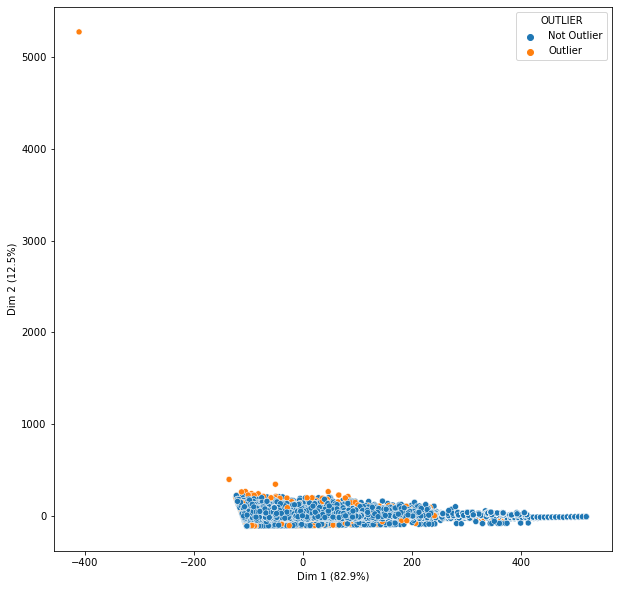

In [67]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_df, x="PC0", y="PC1", hue='OUTLIER')
plt.xlabel('Dim 1 (82.9%)')
plt.ylabel('Dim 2 (12.5%)')

In [194]:
categorical = df.select_dtypes(include=["object",'category']).columns.to_list()
numerical = df.columns.drop(categorical).drop("IsCanceled").to_list()

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Removal of Outliers</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

In [195]:
# TO ALLOW OUTLIER REMOVAL COMMENT LINE BELLOW
df = df_b4_out.copy()

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Catboost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

### Separating X and Y

In [196]:
X=df.drop(["IsCanceled"],axis=1)
y=df.loc[:,"IsCanceled"]
#categorical=X.select_dtypes(include="object").columns.to_list()

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model

In [198]:
cat = CatBoostClassifier(iterations=100,cat_features=categorical,verbose=100)
cat.fit(X_train,y_train)

Learning rate set to 0.5
0:	learn: 0.5436237	total: 34.8ms	remaining: 3.44s
99:	learn: 0.3190408	total: 3.67s	remaining: 0us


### Feature Selection

In [199]:
importances = cat.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

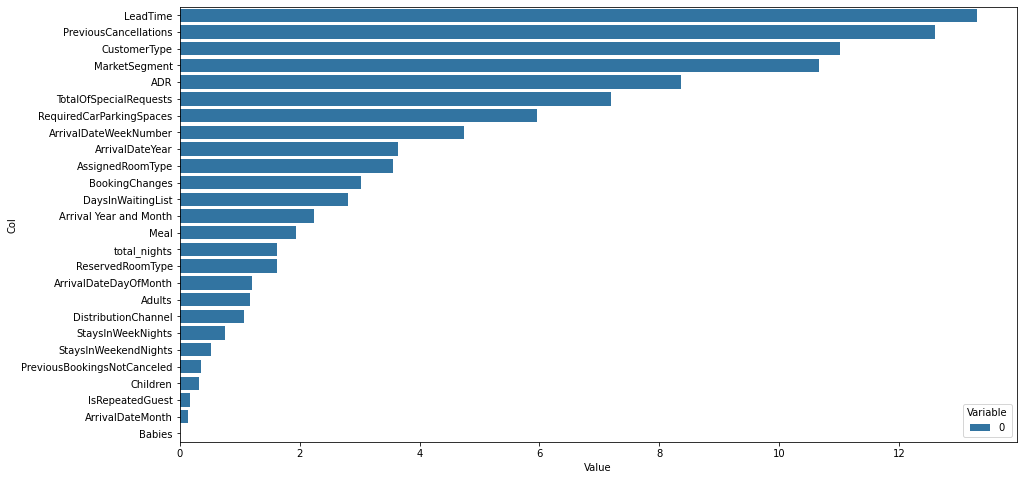

In [200]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [201]:
X_cat=X[zippy.sort_values(by=0,ascending=False).head(20)['col']]

### Data Split after feature selection

In [202]:
categorical=X_cat.select_dtypes(include=["object",'category']).columns.to_list()

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [204]:
cat = CatBoostClassifier(iterations=1000,cat_features=categorical,verbose=1000,random_state=70)
cat.fit(X_train,y_train)

Learning rate set to 0.06062
0:	learn: 0.6555733	total: 61.3ms	remaining: 1m 1s
999:	learn: 0.3085206	total: 57.4s	remaining: 0us


In [205]:
y_train_pred= cat.predict(X_train)
y_test_pred=cat.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     36982
           1       0.88      0.78      0.83     26482

    accuracy                           0.86     63464
   macro avg       0.87      0.85      0.86     63464
weighted avg       0.86      0.86      0.86     63464

[[34226  2756]
 [ 5937 20545]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Cross-Validation

In [206]:
cv_results = cross_validate(cat, X_train,y_train, cv=5, scoring=["accuracy"])
cat_cross_train=cv_results["test_accuracy"].mean()
cat_cross_train

Learning rate set to 0.05511
0:	learn: 0.6565160	total: 53.5ms	remaining: 53.4s
999:	learn: 0.3072087	total: 50.7s	remaining: 0us
Learning rate set to 0.05511
0:	learn: 0.6590034	total: 50.5ms	remaining: 50.4s
999:	learn: 0.3083501	total: 55.4s	remaining: 0us
Learning rate set to 0.05511
0:	learn: 0.6566466	total: 62.4ms	remaining: 1m 2s
999:	learn: 0.3067209	total: 59s	remaining: 0us
Learning rate set to 0.05511
0:	learn: 0.6591066	total: 55.6ms	remaining: 55.6s
999:	learn: 0.3082008	total: 58.1s	remaining: 0us
Learning rate set to 0.055111
0:	learn: 0.6620924	total: 68ms	remaining: 1m 7s
999:	learn: 0.3088949	total: 55.7s	remaining: 0us


0.8464799294667203

In [207]:
cat_cross_std=cv_results["test_accuracy"].std()
cat_cross_std

0.0028956723555146886

In [208]:
cat_test = accuracy_score(y_test_pred,y_test)
cat_test

0.8497415857809152

##### ROC curve

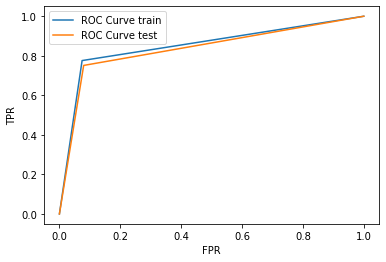

In [209]:
roc_curve_plot(cat,X_train,X_test,y_test,y_train)

In [210]:
cat_auc_train = roc_auc_score(y_train,y_train_pred)
cat_auc_test = roc_auc_score(y_test,y_test_pred)
print(cat_auc_train)
print(cat_auc_test)

0.8506436216736761
0.8357491571434826


### Grid Search Cv

In [211]:
#max_depth_range=[5,6,7] 
#min_samples_leaf_range=[8,9,10,11]
#max_features_range=[12,15,17]
#n_estimators_range=[100,300,500]
#random_state_range=[20,35,70]

In [212]:
#param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
#grid=GridSearchCV(estimator=gb,param_grid=param_grid, cv =5)

In [213]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>7 - Applying One Hot Encoder</font> <a class="anchor" id="seventh-bullet"></a>
    
</div>

### Separating X and Y

In [214]:
X=df.drop(["IsCanceled"],axis=1)
y=df.loc[:,"IsCanceled"]
categorical=X_cat.select_dtypes(include=["object",'category']).columns.to_list()

### One Hot Encoder

In [215]:
df_ohc = X.copy()
categorical=X_cat.select_dtypes(include=["object",'category']).columns.to_list()
ohc = OneHotEncoder(drop='first',sparse=False)
ohc_feat = ohc.fit_transform(df_ohc[categorical])
ohc_feat_names = ohc.get_feature_names(categorical)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
# Reassigning df to contain ohc variables
df_ohc = pd.concat([ohc_df,df_ohc.drop(columns=categorical)], axis=1)
X=df_ohc.select_dtypes(exclude=["object"]).copy()
X.head()

CustomerType_Group  CustomerType_Transient  CustomerType_Transient-Party  \
0                 0.0                     1.0                           0.0   
1                 0.0                     1.0                           0.0   
2                 0.0                     1.0                           0.0   
3                 0.0                     1.0                           0.0   
4                 0.0                     1.0                           0.0   

   MarketSegment_Complementary  MarketSegment_Corporate  MarketSegment_Direct  \
0                          0.0                      0.0                   0.0   
1                          0.0                      0.0                   0.0   
2                          0.0                      0.0                   0.0   
3                          0.0                      0.0                   0.0   
4                          0.0                      0.0                   0.0   

   MarketSegment_Groups  MarketSegment_Offline TA/TO  MarketSegment_Online TA  \
0                   0.0                          1.0                      0.0   
1                   0.0                          0.0                      1.0   
2                   0.0                          0.0                      1.0   
3                   0.0                          0.0                      1.0   
4                   0.0                          0.0                      1.0   

   MarketSegment_Undefined  ...  Babies  IsRepeatedGuest  \
0                      0.0  ...     0.0              0.0   
1                      0.0  ...     0.0              0.0   
2                      0.0  ...     0.0              0.0   
3                      0.0  ...     0.0              0.0   
4                      0.0  ...     0.0              0.0   

   PreviousCancellations  PreviousBookingsNotCanceled  BookingChanges  \
0                    0.0                          0.0             0.0   
1                    0.0                          0.0             0.0   
2                    0.0                          0.0             0.0   
3                    0.0                          0.0             0.0   
4                    0.0                          0.0             0.0   

   DaysInWaitingList   ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests  \
0                0.0   0.0                       0.0                     0.0   
1                0.0  76.5                       0.0                     1.0   
2                0.0  68.0                       0.0                     1.0   
3                0.0  76.5                       0.0                     2.0   
4                0.0  76.5                       0.0                     1.0   

   total_nights  
0             2  
1             4  
2             4  
3             6  
4             2  

[5 rows x 75 columns]

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Gradient Boost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

### 8.1 - Data Splitting

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model

In [217]:
gb = GradientBoostingClassifier() 
gb.fit(X_train,y_train)

GradientBoostingClassifier()

### Feature Selection

In [218]:
importances = gb.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

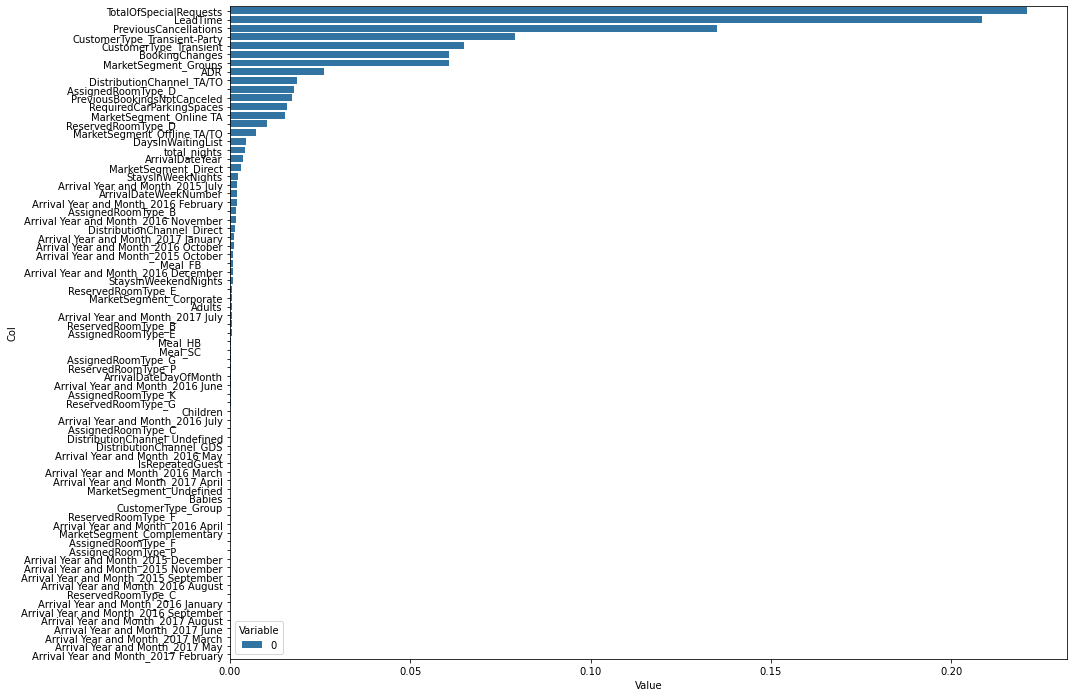

In [219]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,12))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [220]:
X_gb=X[zippy.sort_values(by=0,ascending=False).head(20)['col']]

###  Data Split after feature selection


In [221]:
X_train, X_test, y_train, y_test = train_test_split(X_gb, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [222]:
gb = GradientBoostingClassifier(n_estimators=100,max_features=15,random_state=70,max_depth=5,min_samples_leaf=9) 
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, max_features=15, min_samples_leaf=9,
                           random_state=70)

In [223]:
y_train_pred= gb.predict(X_train)
y_test_pred=gb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     36982
           1       0.86      0.71      0.78     26482

    accuracy                           0.83     63464
   macro avg       0.84      0.81      0.82     63464
weighted avg       0.83      0.83      0.83     63464

[[33896  3086]
 [ 7764 18718]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

##### ROC curve

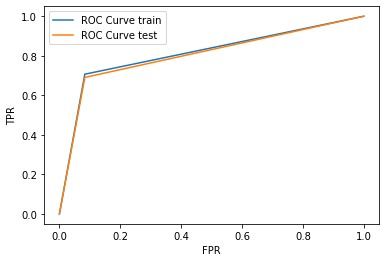

In [224]:
roc_curve_plot(gb,X_train,X_test,y_test,y_train)

In [225]:
gb_auc_train = roc_auc_score(y_train,y_train_pred)
gb_auc_test = roc_auc_score(y_test,y_test_pred)
print(gb_auc_train)
print(gb_auc_test)

0.8116868629248134
0.8035694377188013


### Cross-Validation

In [226]:
cv_results = cross_validate(gb, X_train,y_train, cv=5, scoring=["accuracy"])
gb_cross_train=cv_results["test_accuracy"].mean()
gb_cross_train

0.8252237529444215

In [227]:
gb_cross_std=cv_results["test_accuracy"].std()
gb_cross_std

0.0021997520527353236

In [228]:
gb_test = accuracy_score(y_test_pred,y_test)
gb_test

0.8222614395562838

### Grid Search Cv

In [229]:
#max_depth_range=[5,6,7] 
#min_samples_leaf_range=[8,9,10,11]
#max_features_range=[12,15,17]
#n_estimators_range=[100,300,500]
#random_state_range=[20,35,70]

In [230]:
#param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
#grid=GridSearchCV(estimator=gb,param_grid=param_grid, cv =5)

In [231]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>xGBoost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

In [233]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[18:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Feature Selection

In [234]:
importances = xgb.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

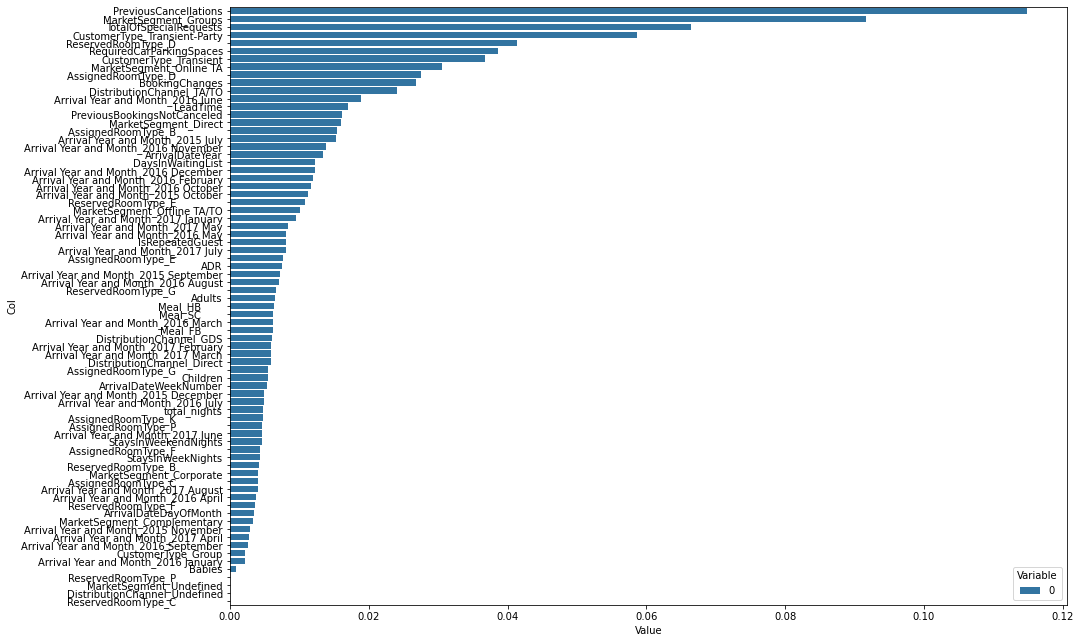

In [235]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,11))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [236]:
X_xgb=X[zippy.sort_values(by=0,ascending=False).head(32)['col']]

#### Data Split after Feature Selection

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_xgb, y, train_size=0.8, random_state=42)

In [238]:
xgb = XGBClassifier(max_depth=5, min_samples_leaf=8)
xgb.fit(X_train,y_train)

[18:15:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:15:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_leaf=8, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [239]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     36957
           1       0.85      0.73      0.78     26507

    accuracy                           0.83     63464
   macro avg       0.83      0.82      0.82     63464
weighted avg       0.83      0.83      0.83     63464

[[33420  3537]
 [ 7147 19360]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Cross-Validation

In [240]:
cv_results = cross_validate(xgb, X_train,y_train, cv=5, scoring=["accuracy"])
xgb_cross_train=cv_results["test_accuracy"].mean()
xgb_cross_train

[18:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

0.8236637411961583

In [241]:
xgb_cross_std=cv_results["test_accuracy"].std()
xgb_cross_std

0.0024161338176366728

In [242]:
xgb_test = accuracy_score(y_test_pred,y_test)
xgb_test

0.8283121139543679

##### Grid Search

In [243]:
max_depth_range=[5,6,7]
min_samples_leaf_range=[8,9,10,11]
max_features_range=[12,15,17]
n_estimators_range=[100,300,500]
random_state_range=[20,35,70]
param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
grid=GridSearchCV(estimator=xgb,param_grid=param_grid, cv =5)

In [244]:
#grid.fit(X_train,y_train)
#grid.best_params_

In [245]:
xgb = XGBClassifier(max_depth=7, min_samples_leaf=8)
xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

[18:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
--------------------------------------------------------------------------------

##### ROC curve

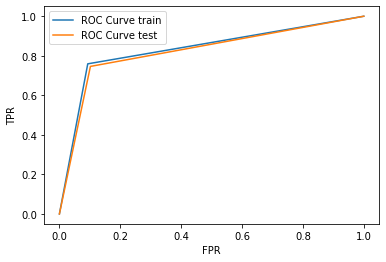

In [246]:
roc_curve_plot(xgb,X_train,X_test,y_test,y_train)

In [247]:
xgb_auc_train = roc_auc_score(y_train,y_train_pred)
xgb_auc_test = roc_auc_score(y_test,y_test_pred)
print(xgb_auc_train)
print(xgb_auc_test)

0.8330626016038299
0.8221742266742087


<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Random Forest Classifier</font> <a class="anchor" id="tenth-bullet"></a>
    
</div>

### Data Splitting

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model 

In [249]:
rf = RandomForestClassifier(criterion="entropy",n_estimators=100,max_features=16,random_state=100,n_jobs=-1,max_depth=16,min_samples_leaf=6)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, max_features=16,
                       min_samples_leaf=6, n_jobs=-1, random_state=100)

### Feature Selection

In [250]:
importances = rf.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

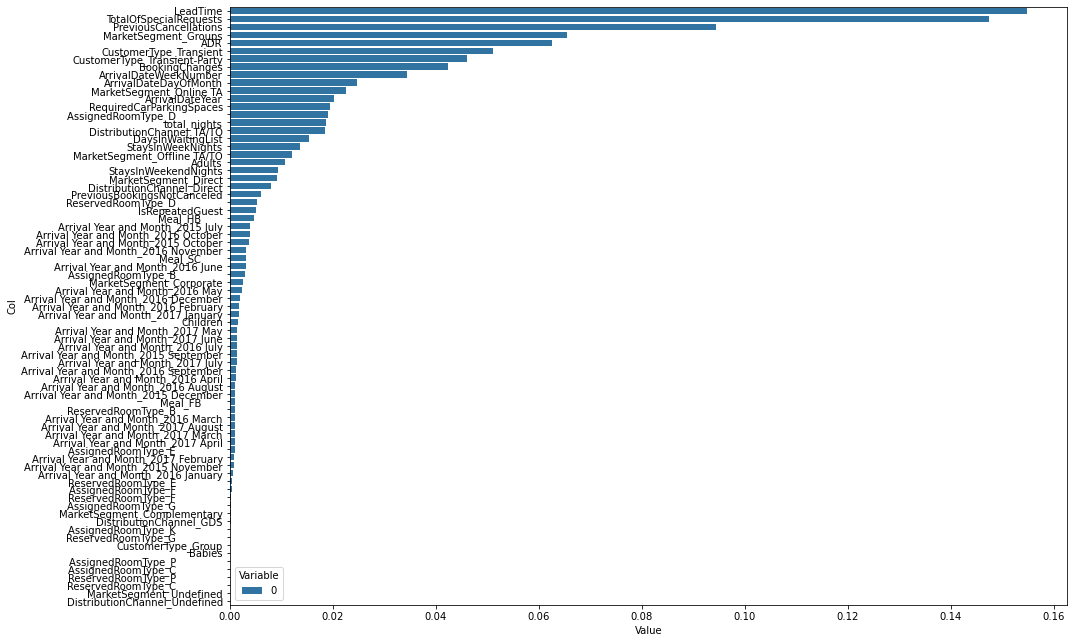

In [251]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,11))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [252]:
X_random=X[zippy.sort_values(by=0,ascending=False).head(35)['col']]

### Data Split after feature selection

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X_random, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    stratify=y)

In [254]:
#criterion="entropy",n_estimators=100,max_features=15,random_state=10,n_jobs=-1,max_depth=16,min_samples_leaf=4

In [255]:
rf = RandomForestClassifier(criterion="entropy",max_depth=18,min_samples_leaf=1,n_jobs=-1)           
                
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=18, n_jobs=-1)

In [256]:
y_train_pred= rf.predict(X_train)
y_test_pred=rf.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     36982
           1       0.90      0.79      0.84     26482

    accuracy                           0.87     63464
   macro avg       0.88      0.86      0.87     63464
weighted avg       0.88      0.87      0.87     63464

[[34612  2370]
 [ 5565 20917]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Cross-Validation

In [257]:
cv_results = cross_validate(rf, X_train,y_train, cv=5, scoring=["accuracy"])
rf_cross_train=cv_results["test_accuracy"].mean()
rf_cross_train

0.8488119272035736

In [258]:
rf_cross_std=cv_results["test_accuracy"].std()
rf_cross_std

0.0012923457044125926

In [259]:
rf_test = accuracy_score(y_test_pred,y_test)
rf_test

0.8501197529307954

##### ROC curve

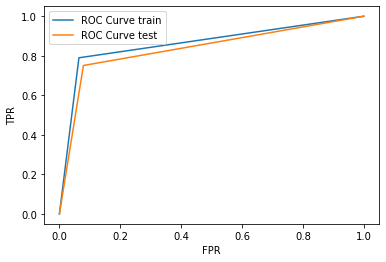

In [260]:
roc_curve_plot(rf,X_train,X_test,y_test,y_train)

In [261]:
rf_auc_train = roc_auc_score(y_train,y_train_pred)
rf_auc_test = roc_auc_score(y_test,y_test_pred)
print(rf_auc_train)
print(rf_auc_test)

0.862886015441694
0.8360307192528099


### Grid Search Cv

In [262]:
#max_depth_range=[12,13,15]
#min_samples_leaf_range=[3,7,8,9]
#max_features_range=[15,16,21,22]
#n_estimators_range=[100,500,1000]
#random_state_range=[70,100,120,200]

In [263]:
#param_grid=dict(max_features=max_features_range)
#grid=GridSearchCV(estimator=rf,param_grid=param_grid, cv =5)

In [264]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Decision Tree</font> <a class="anchor" id="twelveth-bullet"></a>
    
</div>

### Data Splitting

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

###  Model

In [266]:
dt = DecisionTreeClassifier() 
dt.fit(X_train,y_train)

DecisionTreeClassifier()

### Feature Selection

In [267]:
importances = dt.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

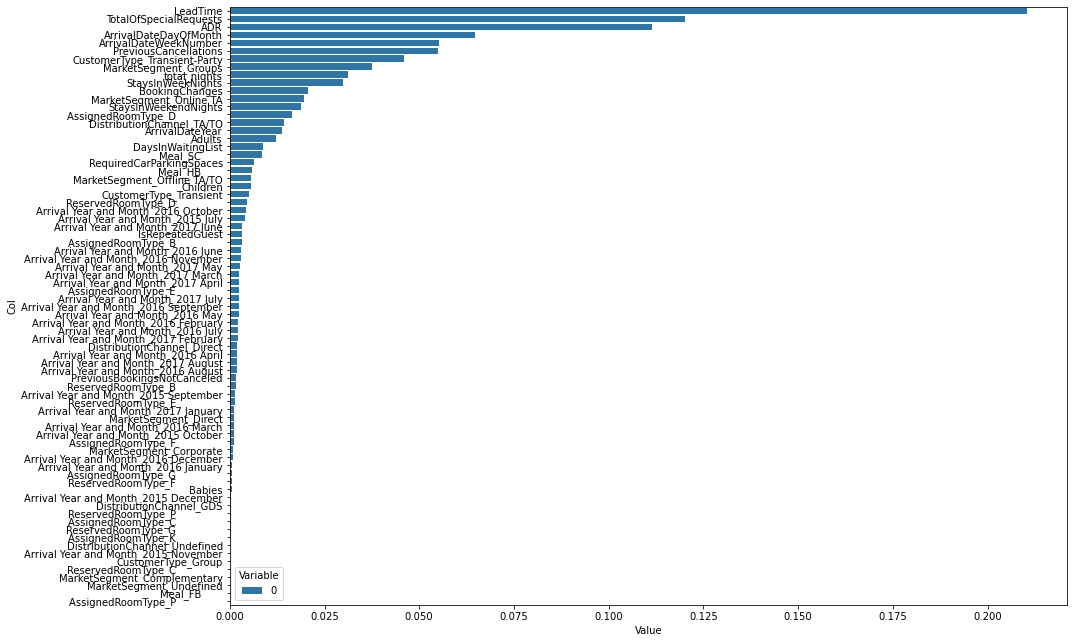

In [268]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,11))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [269]:
X_dt=X[zippy.sort_values(by=0,ascending=False).head(12)['col']]

###  Data Split after feature selection

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [271]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=12,min_samples_leaf=1,random_state=70) 
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=70)

In [272]:
y_train_pred= dt.predict(X_train)
y_test_pred=dt.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     36982
           1       0.83      0.74      0.78     26482

    accuracy                           0.83     63464
   macro avg       0.83      0.82      0.82     63464
weighted avg       0.83      0.83      0.83     63464

[[32896  4086]
 [ 6856 19626]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Cross-Validation

In [273]:
cv_results = cross_validate(dt, X_train,y_train, cv=5, scoring=["accuracy"])
dt_cross_train=cv_results["test_accuracy"].mean()
dt_cross_train

0.80559059020622

In [274]:
dt_cross_std=cv_results["test_accuracy"].std()
dt_cross_std

0.004207250127879447

In [275]:
dt_test = accuracy_score(y_test_pred,y_test)
dt_test

0.8104122021933695

##### ROC curve

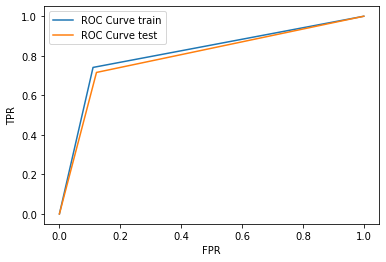

In [276]:
roc_curve_plot(dt,X_train,X_test,y_test,y_train)

In [277]:
dt_auc_train = roc_auc_score(y_train,y_train_pred)
dt_auc_test = roc_auc_score(y_test,y_test_pred)
print(dt_auc_train)
print(dt_auc_test)

0.8153104923326229
0.7969637887013115


### Grid Search Cv

In [278]:
criterion_range=["gini","entropy"] 
max_depth_range=[17,18,19,20]
min_samples_split_range=[1,2,3,4]
min_samples_leaf_range=[4,6,8,10,12,14,16,18,20]
random_state_range=[20,35,70]

In [279]:
param_grid=dict(min_samples_leaf=min_samples_leaf_range)
grid=GridSearchCV(estimator=dt,param_grid=param_grid, cv =5)

In [280]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Extra Trees Classifier</font> <a class="anchor" id="fourteenth-bullet"></a>
    
</div>

### Data Splitting


In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model

In [282]:
etc = ExtraTreesClassifier() 
etc.fit(X_train,y_train)

ExtraTreesClassifier()

### Feature Selection

In [283]:
importances = etc.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

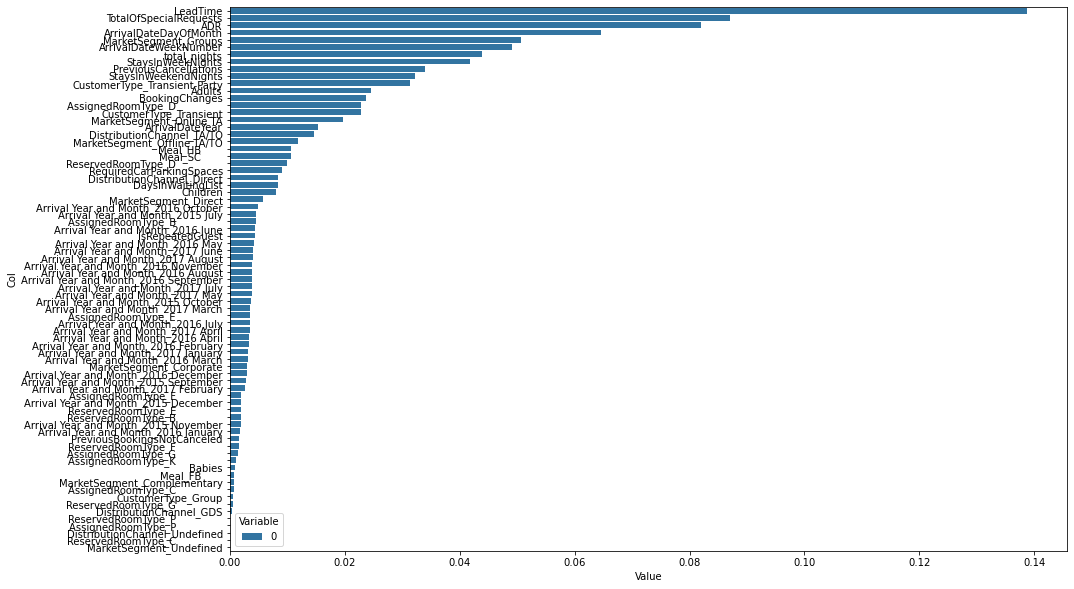

In [284]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,10))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [285]:
X_etc=X[zippy.sort_values(by=0,ascending=False).head(19)['col']]

###  Data Split after feature selection

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X_etc, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [287]:
etc = ExtraTreesClassifier(max_depth=16,min_samples_split=4,min_samples_leaf=2,max_features='log2',random_state=35,n_jobs=-1) 
etc.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=16, max_features='log2', min_samples_leaf=2,
                     min_samples_split=4, n_jobs=-1, random_state=35)

In [288]:
y_train_pred= etc.predict(X_train)
y_test_pred=etc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     36982
           1       0.87      0.72      0.79     26482

    accuracy                           0.84     63464
   macro avg       0.85      0.82      0.83     63464
weighted avg       0.84      0.84      0.84     63464

[[34173  2809]
 [ 7352 19130]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Cross-Validation

In [289]:
cv_results = cross_validate(etc, X_train,y_train, cv=5, scoring=["accuracy"])
etc_cross_train=cv_results["test_accuracy"].mean()
etc_cross_train

0.8270673135809263

In [290]:
etc_cross_std=cv_results["test_accuracy"].std()
etc_cross_std

0.0029015521233595656

In [291]:
etc_test= accuracy_score(y_test_pred,y_test)
etc_test

0.8244043867389386

#### Roc Curve

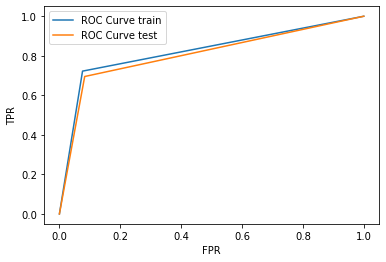

In [292]:
roc_curve_plot(etc,X_train,X_test,y_test,y_train)

In [293]:
etc_auc_train = roc_auc_score(y_train,y_train_pred)
etc_auc_test = roc_auc_score(y_test,y_test_pred)
print(etc_auc_train)
print(etc_auc_test)

0.8232107967571598
0.8060516085015617


<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>AdaBoost Classifier</font> <a class="anchor" id="nineth-bullet"></a>
    
</div>

###  Data Splitting

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model

In [295]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

### Feature Selection

In [296]:
importances = abc.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

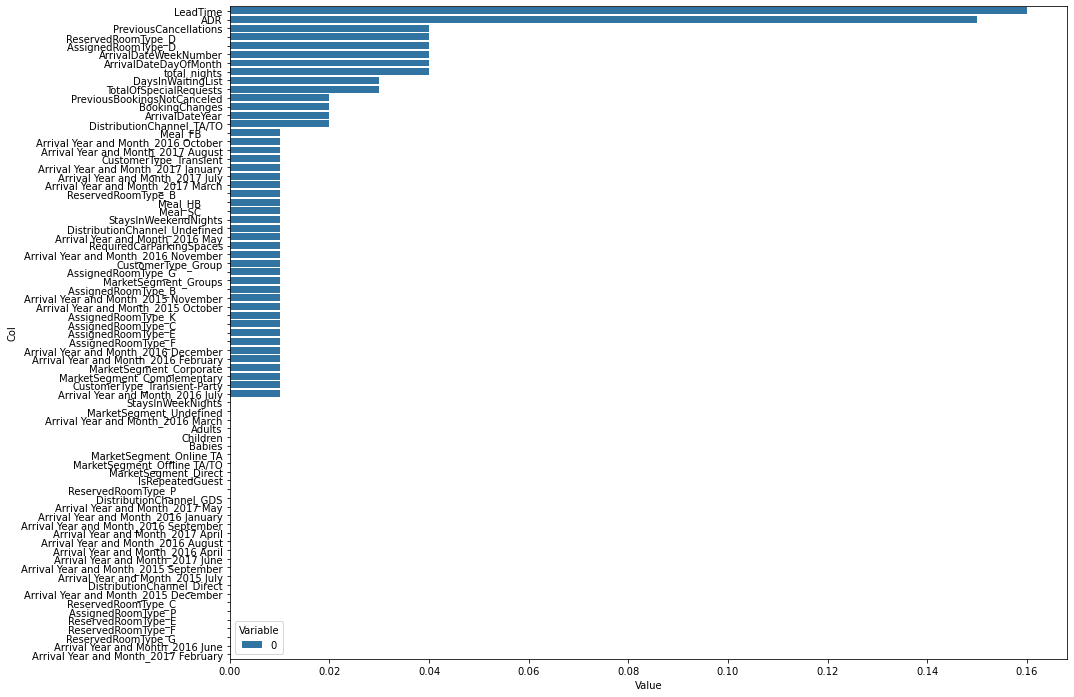

In [297]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,12))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [298]:
X_ada=X[zippy.sort_values(by=0,ascending=False).head(20)['col']]

###  Data Split after feature selection

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X_ada, y, train_size=0.8, random_state=42) 

In [300]:
abc = AdaBoostClassifier(n_estimators=1000, random_state=5)
abc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1000, random_state=5)

In [301]:
y_train_pred = abc.predict(X_train)
y_test_pred = abc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     36957
           1       0.79      0.70      0.74     26507

    accuracy                           0.80     63464
   macro avg       0.80      0.78      0.79     63464
weighted avg       0.80      0.80      0.80     63464

[[32117  4840]
 [ 7962 18545]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Cross-Validation

In [302]:
cv_results = cross_validate(abc, X_train,y_train, cv=5, scoring=["accuracy"])
ada_cross_train=cv_results["test_accuracy"].mean()
ada_cross_train

0.7959315257206543

In [303]:
ada_cross_std=cv_results["test_accuracy"].std()
ada_cross_std

0.0037716510227344723

In [304]:
ada_test = accuracy_score(y_test_pred,y_test)
ada_test

0.7973654355225009

#### Roc Curve

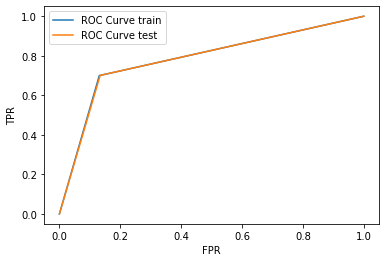

In [305]:
roc_curve_plot(abc,X_train,X_test,y_test,y_train)

In [306]:
ada_auc_train = roc_auc_score(y_train,y_train_pred)
ada_auc_test = roc_auc_score(y_test,y_test_pred)
print(ada_auc_train)
print(ada_auc_test)

0.7843317513420845
0.7834120336929075


## Evaluation and Visualization

In [307]:
data={"Cross Validation Train Accuracy":[cat_cross_train,gb_cross_train,xgb_cross_train,rf_cross_train,dt_cross_train,etc_cross_train,ada_cross_train],
      "Cross Validation Train STD":[cat_cross_std,gb_cross_std,xgb_cross_std,rf_cross_std,dt_cross_std,ada_cross_std,ada_cross_std],
      "Test Accuracy" : [cat_test,gb_test,xgb_test,rf_test,dt_test,etc_test,ada_test],
      "AUC Train Score" : [cat_auc_train,gb_auc_train,xgb_auc_train,rf_auc_train,dt_auc_train,etc_auc_train,ada_auc_train],
      "AUC Test Score" : [cat_auc_test,gb_auc_test,xgb_auc_test,rf_auc_test,dt_auc_test,etc_auc_test,ada_auc_test]
     }

In [308]:
conclusion=pd.DataFrame(data=data,index=["CatBoost","GradientBoost","Extreme Gradient Boost","Random Forest","Decision Tree","Extra Tree","AdaBoost"])
conclusion

Cross Validation Train Accuracy  \
CatBoost                                       0.846480   
GradientBoost                                  0.825224   
Extreme Gradient Boost                         0.823664   
Random Forest                                  0.848812   
Decision Tree                                  0.805591   
Extra Tree                                     0.827067   
AdaBoost                                       0.795932   

                        Cross Validation Train STD  Test Accuracy  \
CatBoost                                  0.002896       0.849742   
GradientBoost                             0.002200       0.822261   
Extreme Gradient Boost                    0.002416       0.828312   
Random Forest                             0.001292       0.850120   
Decision Tree                             0.004207       0.810412   
Extra Tree                                0.003772       0.824404   
AdaBoost                                  0.003772       0.797365   

                        AUC Train Score  AUC Test Score  
CatBoost                       0.850644        0.835749  
GradientBoost                  0.811687        0.803569  
Extreme Gradient Boost         0.833063        0.822174  
Random Forest                  0.862886        0.836031  
Decision Tree                  0.815310        0.796964  
Extra Tree                     0.823211        0.806052  
AdaBoost                       0.784332        0.783412